In [2]:
import librosa
import numpy as np
from constants import *
import IPython.display as ipd
import matplotlib.pyplot as plt

In [3]:

signal, _ = librosa.load("dataset/ney/00_Ney_C_3.wav", mono=True, sr=SR)
y_padded = librosa.util.fix_length(signal, size=len(signal) + HOP)

stft = librosa.stft(y_padded, n_fft=N_FFT, hop_length=HOP)
print(f"STFT: {stft.shape}")

restored_signal = librosa.istft(stft[:-1], n_fft=N_FFT, hop_length=HOP)
print(f"Orig: {signal.shape}, Inv: {restored_signal.shape}")

ipd.Audio(signal, rate=SR)

STFT: (513, 1595)
Orig: (102000,), Inv: (102016,)


In [4]:
ipd.Audio(restored_signal, rate=SR)

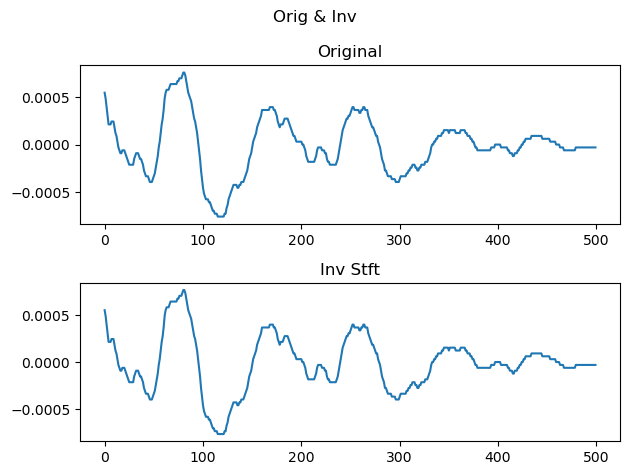

In [5]:
start = 101500
end = 102000
fig, axs = plt.subplots(2)
fig.suptitle("Orig & Inv")
axs[0].set_title("Original")
axs[0].plot(signal[start:end])
axs[1].set_title("Inv Stft")
axs[1].plot(restored_signal[start:end])
fig.tight_layout()
plt.show()

In [6]:
stft[10][:5]

array([-0.02060714+0.10935469j,  0.126902  -0.03268807j,
       -0.13700879-0.1459887j , -0.0244905 +0.24024022j,
        0.24258307-0.04146368j], dtype=complex64)

In [7]:
real_part = np.real(stft)
im_part = np.imag(stft)
print(real_part[10][:5])
print(im_part[10][:5])

[-0.02060714  0.126902   -0.13700879 -0.0244905   0.24258307]
[ 0.10935469 -0.03268807 -0.1459887   0.24024022 -0.04146368]


In [8]:
recons = real_part + im_part * 1j
recons[10][:5]

array([-0.02060714+0.10935469j,  0.126902  -0.03268807j,
       -0.13700879-0.1459887j , -0.0244905 +0.24024022j,
        0.24258307-0.04146368j], dtype=complex64)

In [9]:
print(real_part.shape, im_part.shape)

(513, 1595) (513, 1595)


In [10]:
re_signal = librosa.istft(recons[:-1], n_fft=N_FFT, hop_length=HOP)
print(f"Orig: {signal.shape}, Inv: {restored_signal.shape}")

ipd.Audio(re_signal, rate=SR)

Orig: (102000,), Inv: (102016,)


In [11]:
joined = np.concatenate((real_part, im_part))
print(joined.shape, len(joined))

(1026, 1595) 1026


In [12]:
re_sep = joined[:len(joined) // 2]
im_sep = joined[len(joined) // 2:]
print(re_sep[10][:5])
print(im_sep[10][:5])

[-0.02060714  0.126902   -0.13700879 -0.0244905   0.24258307]
[ 0.10935469 -0.03268807 -0.1459887   0.24024022 -0.04146368]


In [13]:
subset = signal[:4800]
ipd.Audio(subset, rate=SR)

In [14]:
subset_padded = librosa.util.fix_length(subset, size=len(subset) + HOP)
subset_stft = librosa.stft(subset_padded, n_fft=N_FFT, hop_length=HOP)
print(f"STFT: {subset_stft.shape}")

subset_restored_signal = librosa.istft(subset_stft[:-1], n_fft=N_FFT, hop_length=HOP)
print(f"Orig: {subset.shape}, Inv: {subset_restored_signal.shape}")
ipd.Audio(subset_restored_signal, rate=SR)

STFT: (513, 77)
Orig: (4800,), Inv: (4864,)


In [15]:
truncated_subset = subset_restored_signal[:4800]
print(len(truncated_subset), truncated_subset[-5:])

slope = np.linspace(1, 0, 40)
truncated_subset[-40:] = truncated_subset[-40:] * slope 
print(len(truncated_subset), truncated_subset[-5:])

4800 [-0.4174519  -0.40734696 -0.3937392  -0.3831471  -0.3758858 ]
4800 [-0.04281558 -0.03133438 -0.02019175 -0.00982428 -0.        ]
